<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

: 

### **Задание 0**
Для чего фиксируем сиды в домашках?

Для воспроизводимости результатов. Чтобы при разных запусках получали одни и те же результаты.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [3]:
df_train[:5]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [6]:
# Колонки с пропущенными значениями в df_train
df_train.columns[df_train.isnull().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [7]:
# Колонки с пропущенными значениями в df_test
df_test.columns[df_test.isnull().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [8]:
# Вывод количества явных дубликатов в df_train
df_train.duplicated().sum()

985

In [9]:
# Вывод количества явных дубликатов в df_test
df_test.duplicated().sum()

62

In [ ]:
# Построение дашборда
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")
profile.to_file("your_report.html")

Судя по информации на дашборде распределение почти всех численных признаков выглядит ненормально и смещенно. В категориальных признаках также присутствует дисбаланс значений.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [11]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [12]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [13]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [14]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


Среднее и медиана в колонках отличаются из-за наличия выбросов и смещенности распределений.

### **Задание 3 (0.2 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [15]:
# Количество дубликатов без целевой переменной
df_tr_dupl = df_train.drop('selling_price', axis=1).duplicated()
df_tr_dupl.sum()

1159

In [16]:
# Вывод паовторяющихся строк
df_train[df_tr_dupl]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [17]:
df_train = df_train[~df_tr_dupl].reset_index(drop=True)

In [18]:
assert df_train.shape == (5840, 13)
print(True)

True


### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [19]:
# Приводим колонки 'mileage', 'engine', 'max_power' к типу float

import re

for df in [df_train, df_test]:
    for col in ['mileage', 'engine', 'max_power']:
        df[col] = df[col].apply(lambda x: re.sub(r'[^0-9.]', '', x) if isinstance(x, str) else x)
        df[col] = df[col].replace('', None)
        df[col] = df[col].astype('float')

In [20]:
# Напишу ф-ю, которая определяет единицы измерения torque
# Делает значение 9.81, если kgm, и 1, если nm
# Буду в дальнейшем приводить все в nm

def is_nm_kgm(x):
    if isinstance(x, str):
        if 'kgm' in x.lower():
            return 9.81
        else:
            return 1
    else:
        return x

In [21]:
df_train['is_nm_kgm'] = df_train['torque'].apply(is_nm_kgm)
df_test['is_nm_kgm'] = df_test['torque'].apply(is_nm_kgm)

In [22]:
# Вытащу из колонки torque все числа в список
# 1 число в списке - значение torque
# 2 и далее числа в списке - обороты, из которых буду доставать максимум

def extract_nums(x):
    if isinstance(x, str):
        return [float(num.replace(',', '').replace('.', '.')) for num in re.findall(r'\d+(?:\.\d+)?(?:,\d{3})*', x)]
    else:
        return x

In [23]:
df_train['torque_nums'] = df_train['torque'].apply(extract_nums)
df_test['torque_nums'] = df_test['torque'].apply(extract_nums)

In [24]:
# Достаю первое число из списка с числами в отдельную колонку

df_train['torque_first'] = df_train['torque_nums'].apply(lambda x: x[0] if isinstance(x, list) else x)
df_test['torque_first'] = df_test['torque_nums'].apply(lambda x: x[0] if isinstance(x, list) else x)

In [25]:
# Нахожу максимум из второго и последующих чисел в списке

df_train['max_torque'] = df_train['torque_nums'].apply(lambda x: max(x[1:]) if isinstance(x, list) and len(x[1:]) > 0 else None)
df_test['max_torque'] = df_test['torque_nums'].apply(lambda x: max(x[1:]) if isinstance(x, list) and len(x[1:]) > 0 else None)

In [26]:
df_train['torque'] = df_train['torque_first'] * df_train['is_nm_kgm']
df_test['torque'] = df_test['torque_first'] * df_test['is_nm_kgm']

In [27]:
# Вот, как выглядели колонки, которые я насоздавал

df_train[:4]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,is_nm_kgm,torque_nums,torque_first,max_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000,5.0,1.00,"[190.0, 2000.0]",190.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000,5.0,1.00,"[250.0, 1500.0, 2500.0]",250.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.744,5.0,9.81,"[22.4, 1750.0, 2750.0]",22.4,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.815,5.0,9.81,"[11.5, 4500.0]",11.5,4500.0


In [28]:
# Наконец удалим ненужные колонки

df_train.drop(['is_nm_kgm', 'torque_nums', 'torque_first'], axis=1, inplace=True)
df_test.drop(['is_nm_kgm', 'torque_nums', 'torque_first'], axis=1, inplace=True)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [29]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns
medians = df_train.select_dtypes(include=[np.number]).median()

for col in numeric_cols:
    df_train[col].fillna(medians[col], inplace=True)
    df_test[col].fillna(medians[col], inplace=True)

C:\Users\alexm\AppData\Local\Temp\ipykernel_15480\1650120089.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(medians[col], inplace=True)
C:\Users\alexm\AppData\Local\Temp\ipykernel_15480\1650120089.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  torque         5840 non-null   float64
 12  seats          5840 non-null   float64
 13  max_torque     5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   float64
 10  max_power      1000 non-null   float64
 11  torque         1000 non-null   float64
 12  seats          1000 non-null   float64
 13  max_torque     1000 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


Для заполнения пропусков можно было взять и среднее, однако медиана более устойчивая к выбросам характеристика, поэтому при несбалансированности данных пропуски лучше заполнять ею.

Медиану для заполнения правильно посчитать на трейне и заполнять этими значениями пропуски в тесте, а не высчитывать отдельную медиану для теста.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [32]:
df_train['engine'] = df_train['engine'].astype('int')
df_test['engine'] = df_test['engine'].astype('int')

df_train['seats'] = df_train['seats'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')

In [33]:
df_train['seats'].unique()

array([ 5,  4,  7,  8,  6,  9, 10, 14,  2])

In [34]:
df_test['seats'].unique()

array([7, 5, 6, 4, 8, 9])

Количество посадочных мест в автомобиле ограниченно и не может иметь других значений кроме тех, которые встречаются в датасете. Однако она может выступать как ранговая численная переменная (чем больше мест, тем выше цена). Но с другой стороны можно поделить эту переменную на группы по категориям (например, для значений меньше 7 это будет легковые автомобили, иначе грузовые автомобили).

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [35]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,175.935918,5.426712,3045.789041
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,116.779426,0.982344,911.039323
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.088000,2.000000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,111.800000,5.000000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.124000,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,3727.800000,14.000000,21800.000000


In [36]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [37]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,177.621834,5.403000,3098.27600
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,103.745986,0.912921,877.14712
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,48.000000,4.000000,1500.00000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,111.700000,5.000000,2500.00000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,160.000000,5.000000,3000.00000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,205.000000,5.000000,4000.00000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,1422.450000,9.000000,5200.00000


In [38]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


Поскольку мы заполнили пропуски медианными значениями, то распределения переменных остались теми же, что и до заполнения. Заполнение же пропусков средними значениями сдвинуло бы распределения.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

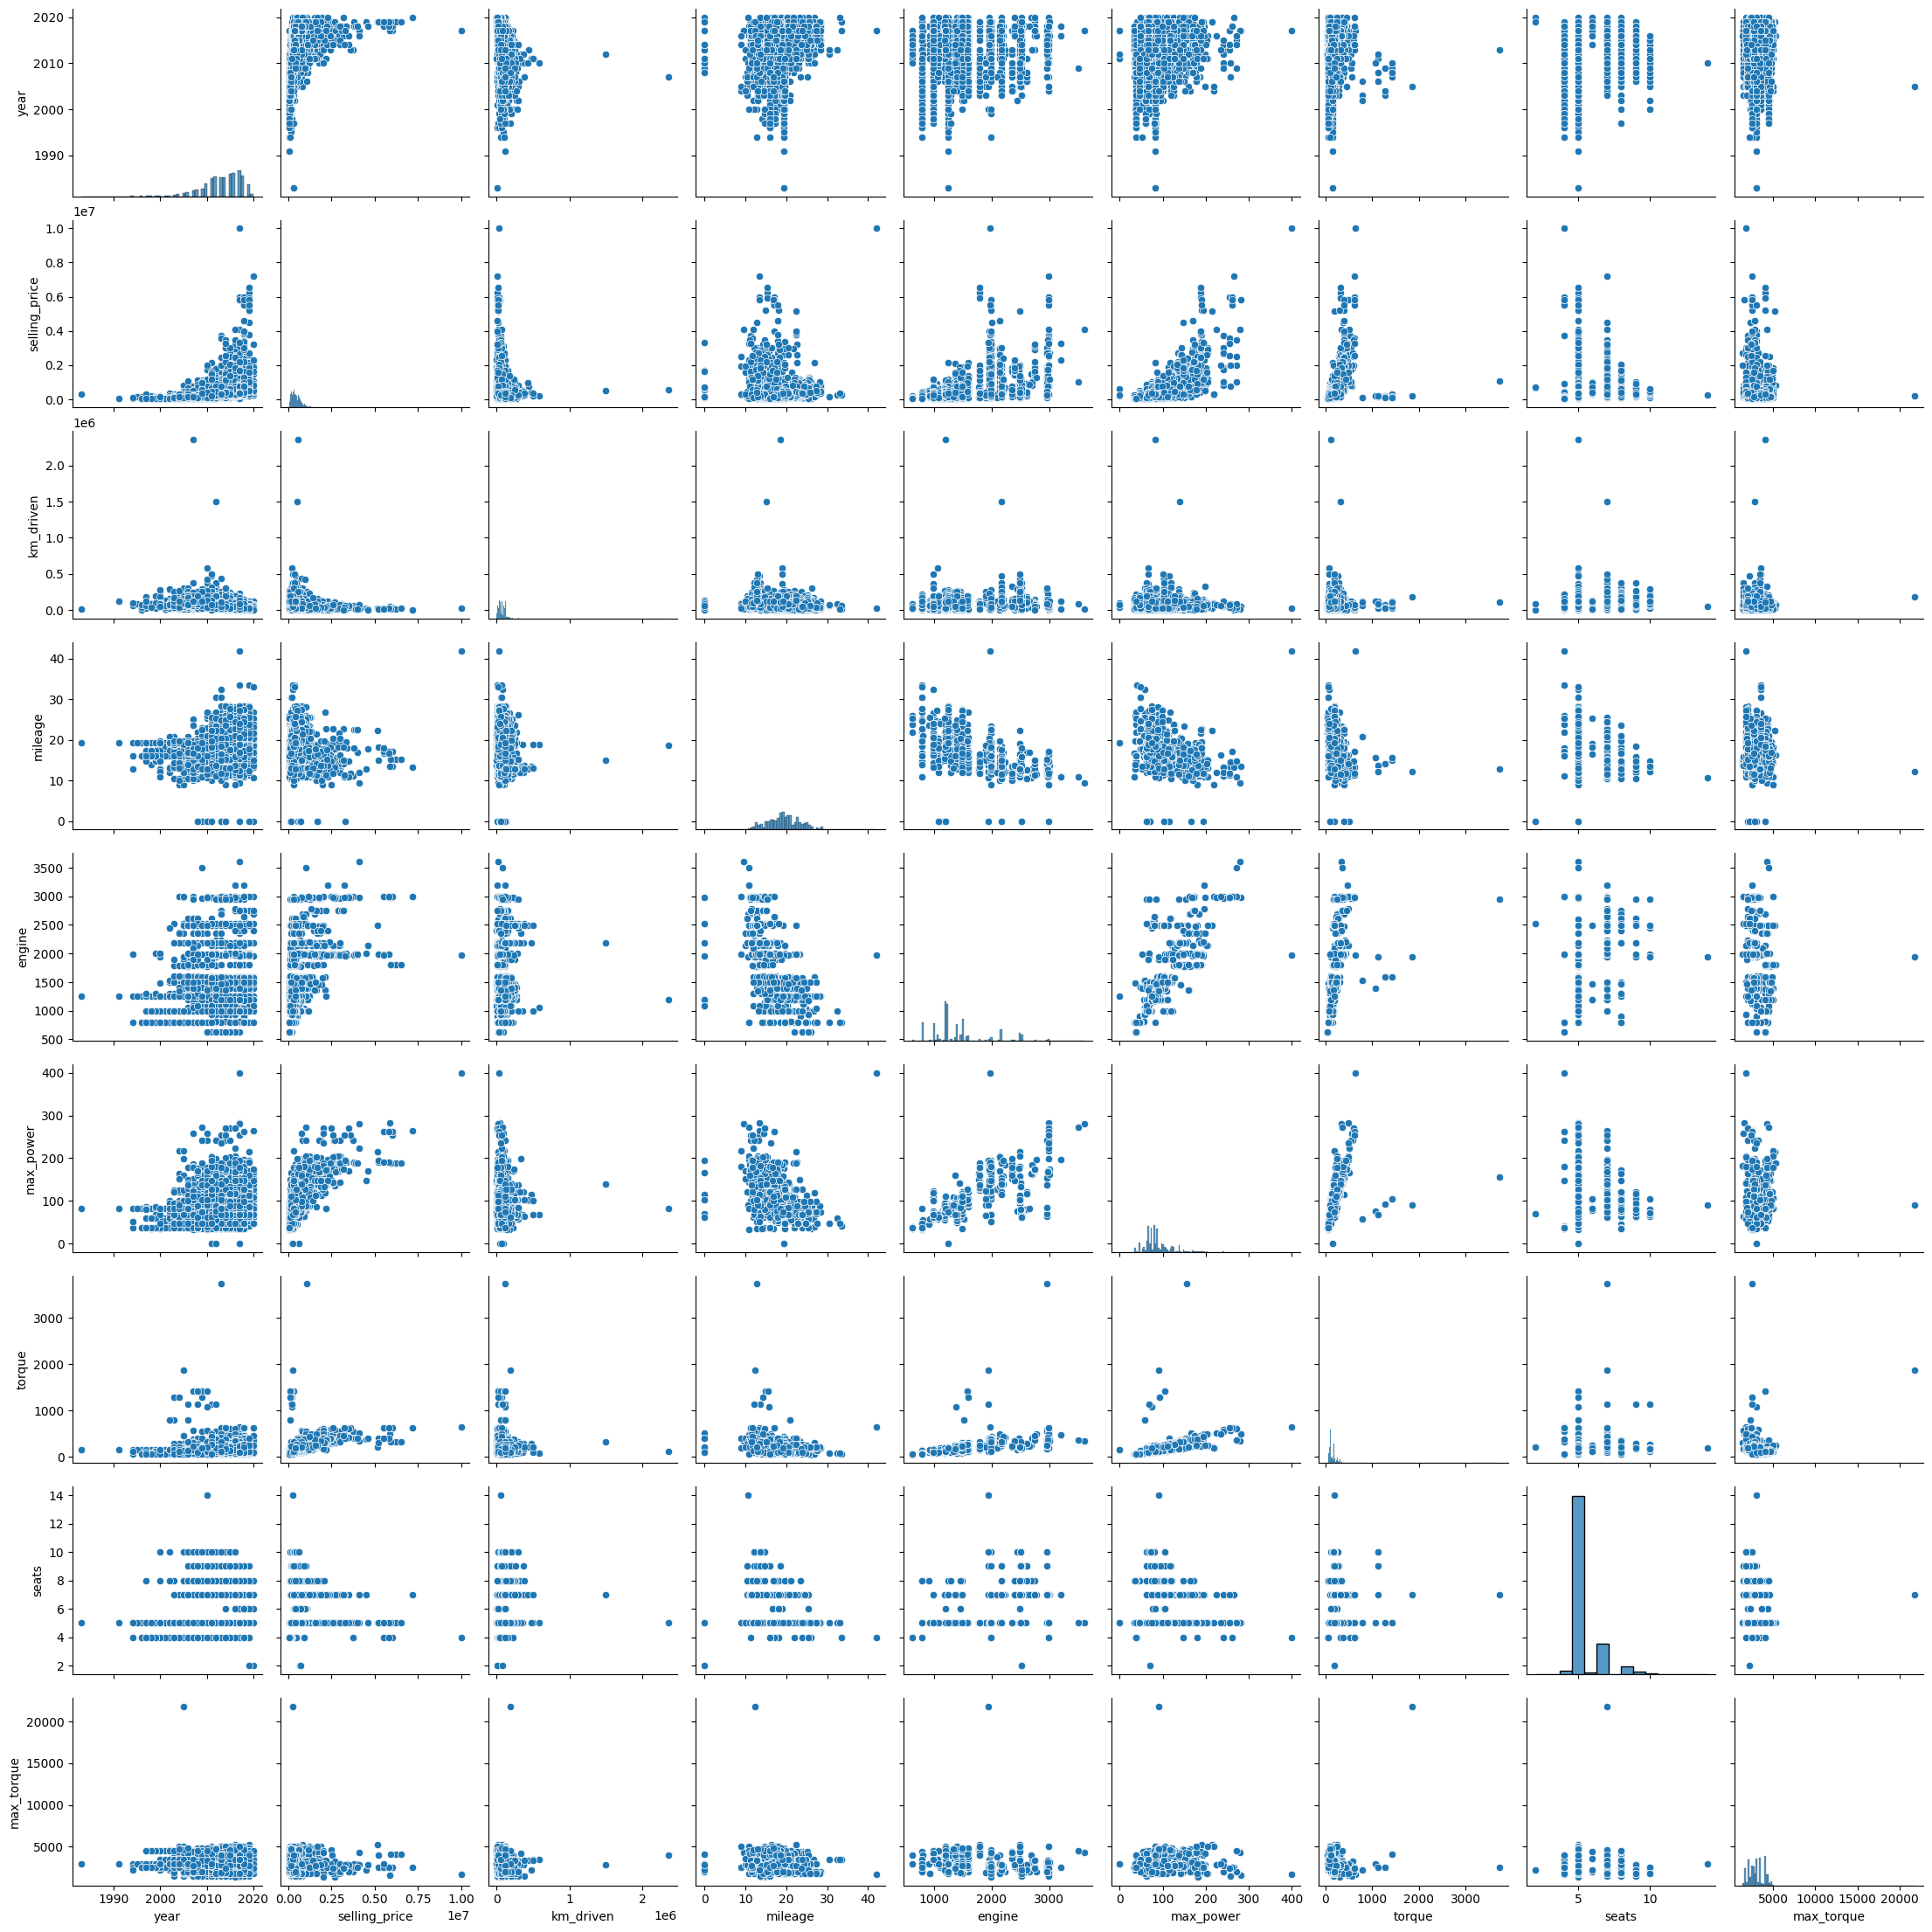

In [39]:
sns.pairplot(df_train)

Судя по графику попарных скаттерплотов, можно выдвинуть гипотезу и взаимосвязи колонок year, km_driven, max_power, torque с целевой переменной. Конечно, никаких выводов сделать нельзя, но по визуальному анализу можно ожидать, что эти переменные внесут бОльший вклад в предсказание.

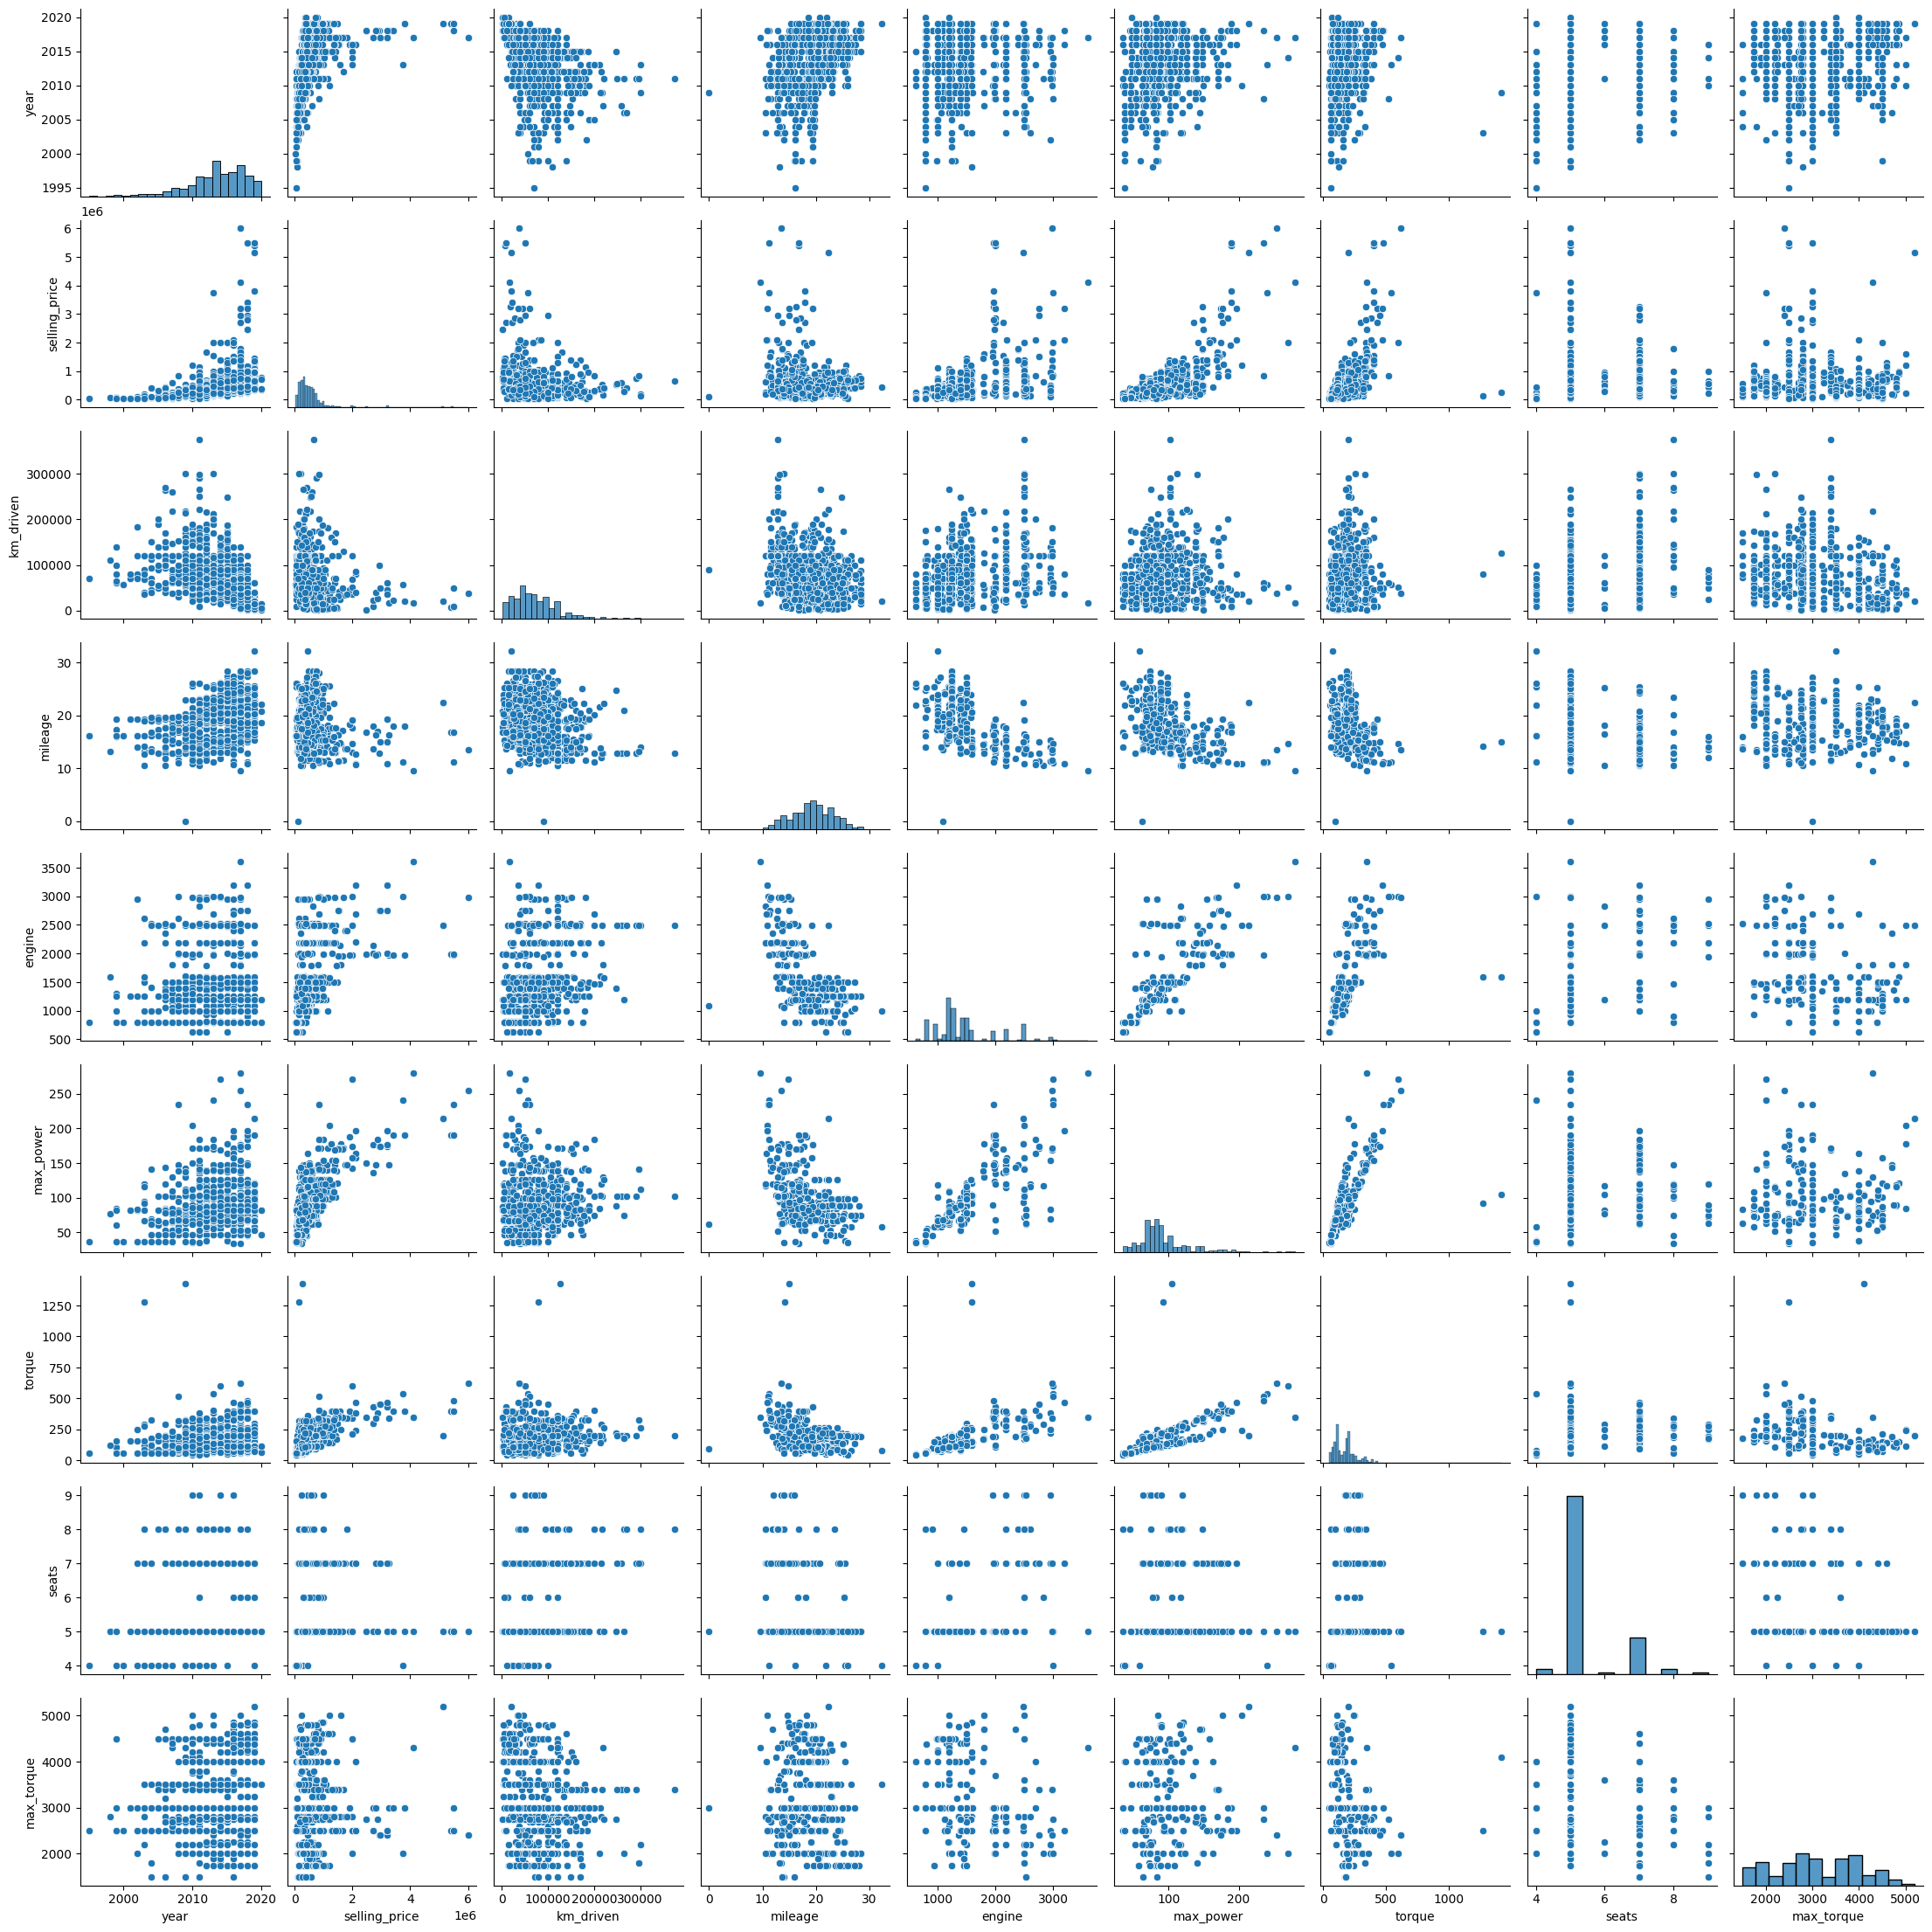

In [40]:
sns.pairplot(df_test)

Зависимотси переменных от целевой переменной получились похожими. В трейне есть несколько больших выбросов, которые искажают картину распределений (в колонке max_torque, например). От выбросов в будущем нужно будет избавиться.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

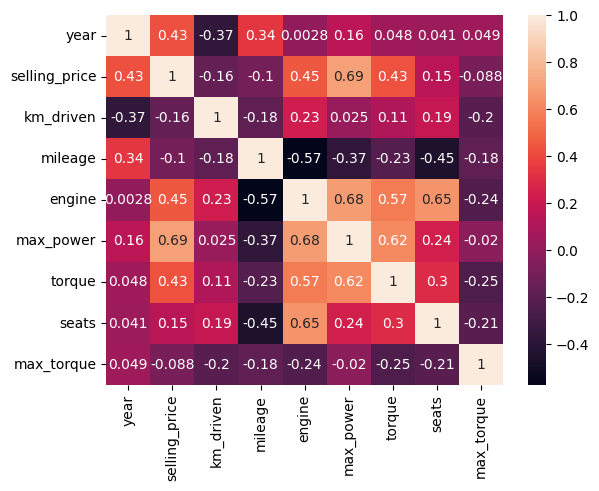

In [41]:
sns.heatmap(df_train.corr(numeric_only=True), annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Меньше всего связаны признаки year и engine.<br>
Сильная положительная зависимость наблюдается у selling_price и max_power.<br>
У признаков km_driven и year отрицательная зависимость, поэтому суждение можно считать верным.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [42]:
def spearman_corr(x, y):
    rank_x = np.argsort(np.argsort(x))
    rank_y = np.argsort(np.argsort(y))
    
    d = rank_x - rank_y
    n = len(x)
    
    corr = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))
    return corr

numeric_cols = df_train.select_dtypes(include=[np.number]).columns
spearman_arr = np.zeros((len(numeric_cols), len(numeric_cols)))

for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        spearman_arr[i, j] = spearman_corr(df_train[numeric_cols[i]], df_train[numeric_cols[j]])

In [43]:
pd.DataFrame(spearman_arr)

,0,1,2,3,4,5,6,7,8
0,1.000000,0.705060,-0.566218,0.342960,-0.034677,0.166875,0.103450,0.050485,0.072886
1,0.705060,1.000000,-0.295699,0.026164,0.461866,0.612352,0.581206,0.220670,-0.127061
2,-0.566218,-0.295699,1.000000,-0.197687,0.303411,0.040464,0.242401,0.105454,-0.318107
3,0.342960,0.026164,-0.197687,1.000000,-0.428987,-0.308684,-0.163013,-0.307221,-0.175478
4,-0.034677,0.461866,0.303411,-0.428987,1.000000,0.711526,0.840125,0.361660,-0.369537
5,0.166875,0.612352,0.040464,-0.308684,0.711526,1.000000,0.778859,0.200687,-0.024025
6,0.103450,0.581206,0.242401,-0.163013,0.840125,0.778859,1.000000,0.286429,-0.522928
7,0.050485,0.220670,0.105454,-0.307221,0.361660,0.200687,0.286429,1.000000,-0.129393
8,0.072886,-0.127061,-0.318107,-0.175478,-0.369537,-0.024025,-0.522928,-0.129393,1.000000


In [44]:
df_train.corr(method='spearman', numeric_only=True)

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque
year,1.000000,0.707123,-0.569659,0.346132,-0.038056,0.165798,0.102220,0.048291,0.076801
selling_price,0.707123,1.000000,-0.295665,0.026186,0.463577,0.612258,0.582099,0.317605,-0.126948
km_driven,-0.569659,-0.295665,1.000000,-0.198466,0.304504,0.040919,0.243174,0.195317,-0.321022
mileage,0.346132,0.026186,-0.198466,1.000000,-0.429871,-0.308824,-0.162423,-0.435458,-0.177191
engine,-0.038056,0.463577,0.304504,-0.429871,1.000000,0.713113,0.842430,0.527716,-0.372690
max_power,0.165798,0.612258,0.040919,-0.308824,0.713113,1.000000,0.779635,0.304857,-0.024798
torque,0.102220,0.582099,0.243174,-0.162423,0.842430,0.779635,1.000000,0.438233,-0.526370
seats,0.048291,0.317605,0.195317,-0.435458,0.527716,0.304857,0.438233,1.000000,-0.201905
max_torque,0.076801,-0.126948,-0.321022,-0.177191,-0.372690,-0.024798,-0.526370,-0.201905,1.000000


Есть небольшие неточности, но в целом получилось похоже.

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque']


C:\Users\alexm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

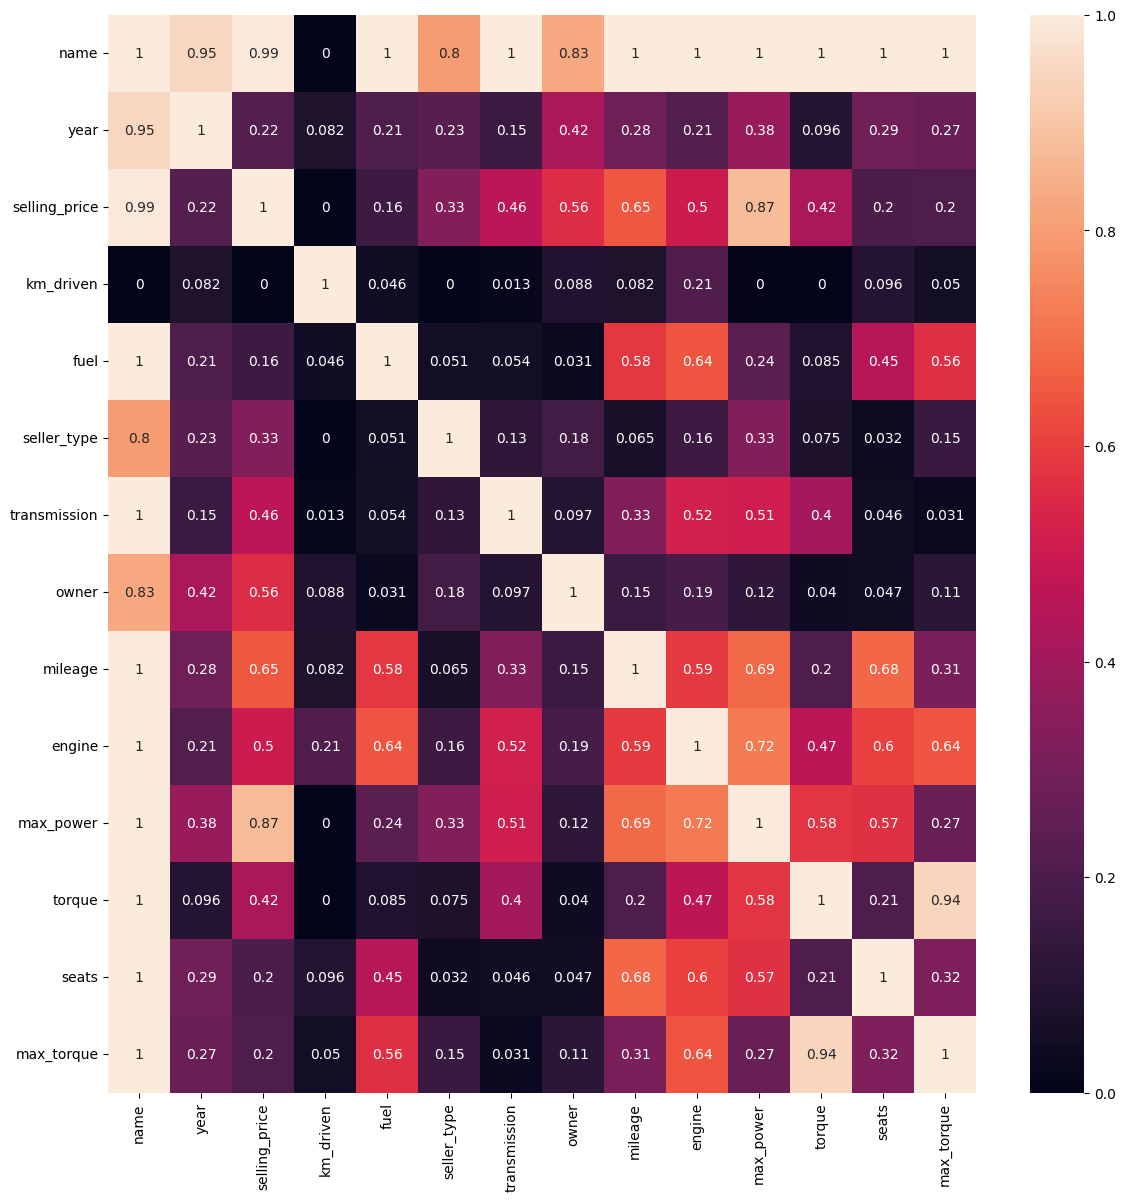

In [45]:
import phik
plt.figure(figsize=(14, 14))
sns.heatmap(df_train.phik_matrix(), annot=True)

Можно заметить, что name идеально коррелирует почти со всеми колонками. Связано это с тем, что в этой переменной находится много уникальных значений.<br>
С целевой переменной лучше всего коррелируют max_power, milleage, owner.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Посмотрим на распределения всех численных переменных.

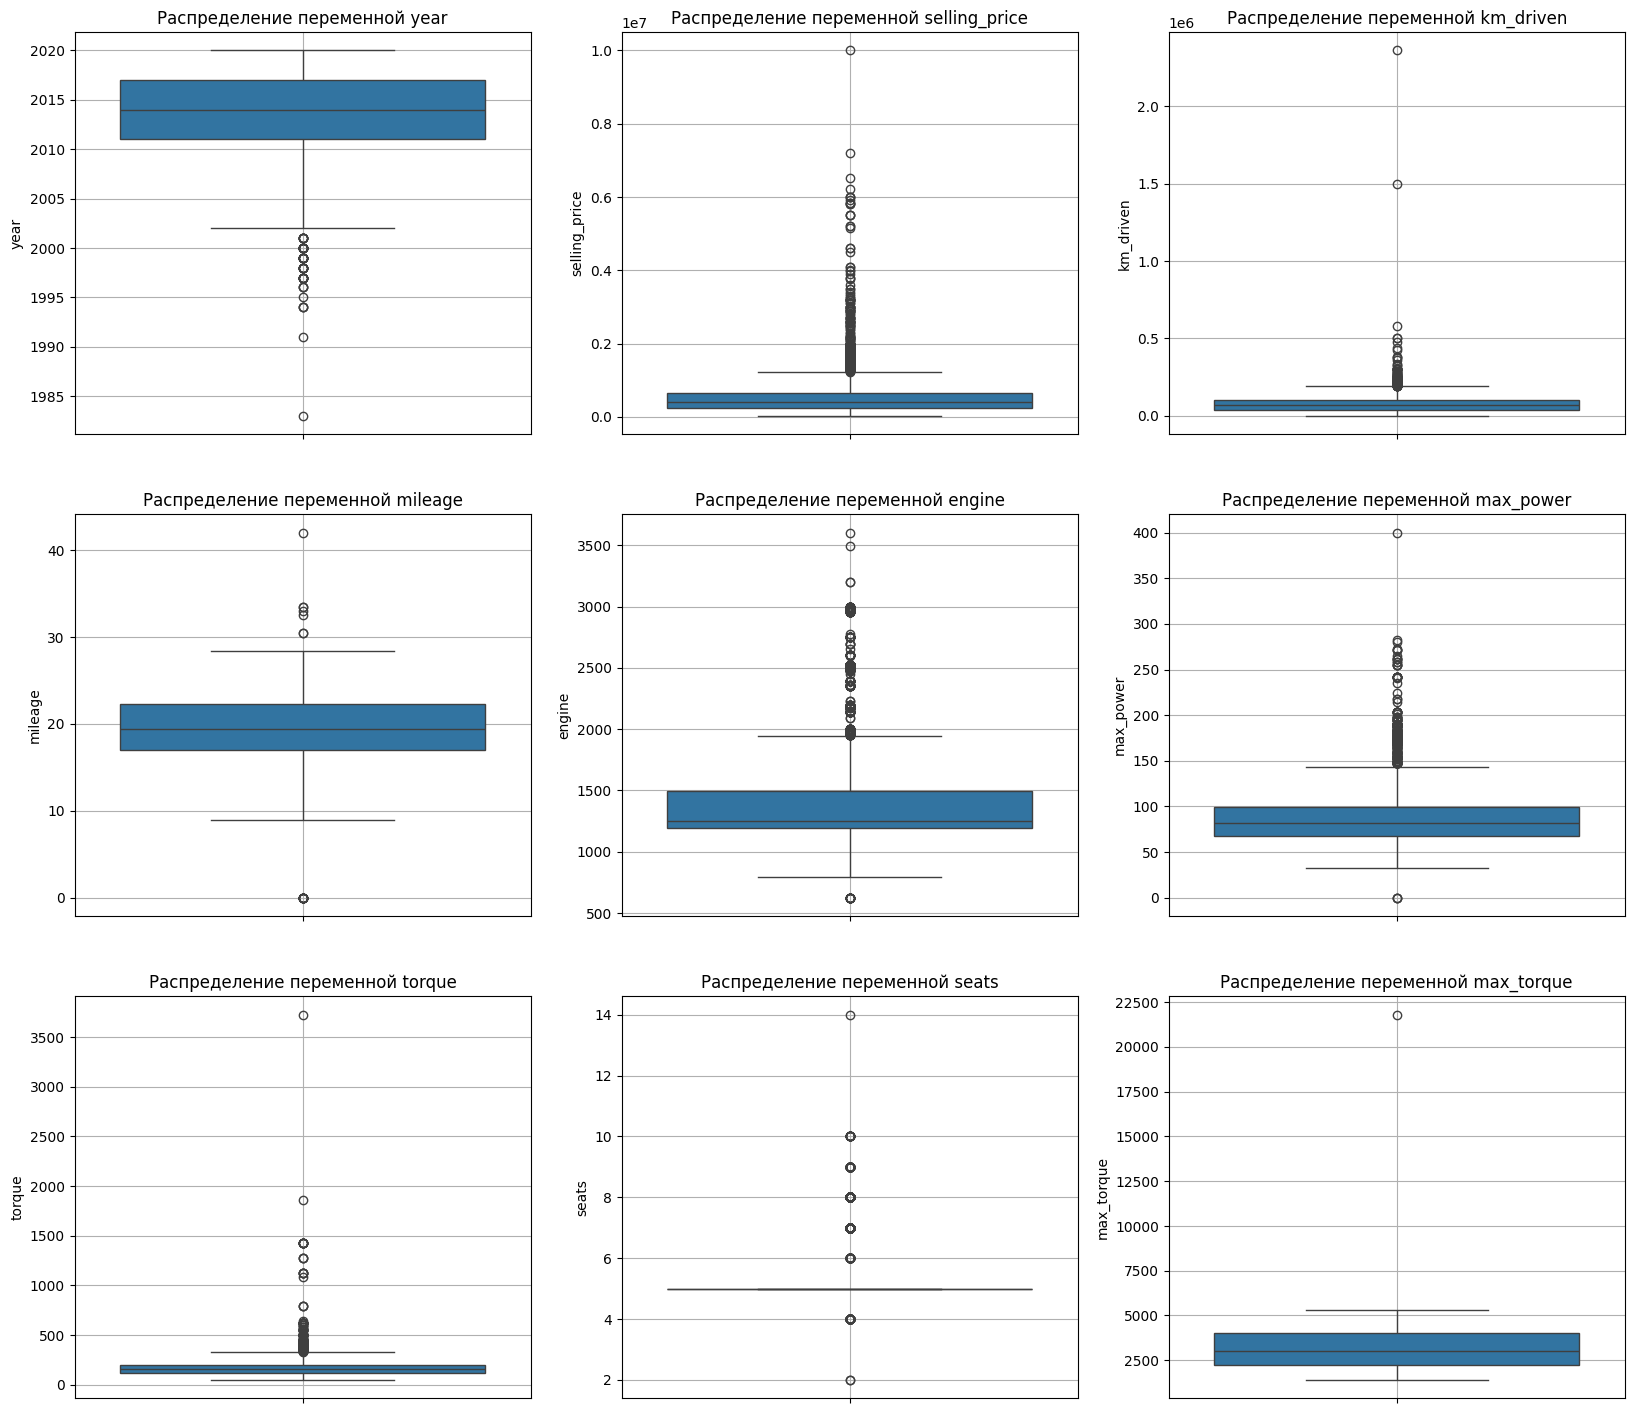

In [46]:
def plot_boxes(columns_lst):
    n_plots = len(columns_lst)
    fig, axs = plt.subplots(n_plots // 3 + 1, 3, figsize=(20, (n_plots // 3 + 1) * 6))

    for ax, col in zip(axs.flatten(), columns_lst):
        sns.boxplot(data=df_train[col], ax=ax)
        ax.set_title(f"Распределение переменной {col}")
        ax.grid()

    for i in range(n_plots, len(axs.flatten())):
        fig.delaxes(axs.flatten()[i])

    plt.show()

plot_boxes(numeric_cols)

Видно, что много из них распределены ненормально, содержат много выбросов.

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [47]:
y_train = df_train['selling_price']
X_train = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque']]

In [48]:
assert X_train.shape == (5840, 8)
print(True)

True


In [49]:
y_test = df_test['selling_price']
X_test = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque']]

In [50]:
assert X_test.shape == (1000, 8)
print(True)

True


### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr_base = LinearRegression()
lr_base.fit(X_train, y_train)

y_pred_train = lr_base.predict(X_train)
y_pred_test = lr_base.predict(X_test)

print('train:', 'R2:', r2_score(y_train, y_pred_train), 'MSE', MSE(y_train, y_pred_train))
print('test:', 'R2:', r2_score(y_test, y_pred_test), 'MSE', MSE(y_test, y_pred_test))

train: R2: 0.6010684114320015 MSE 114349087665.60315
test: R2: 0.6004563304091829 MSE 229669110505.37326


По значениям MSE понять сложно, а по R2 получилось 0.6, что довольно неплохо для бейзлайна.

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [52]:
def r2_score_scratch(y_true, y_pred):
    y_mean = np.mean(y_true)

    sse = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_mean) ** 2)

    r2 = 1 - (sse / sst)
    
    return r2

In [53]:
r2_score(y_train, y_pred_train) == r2_score_scratch(y_train, y_pred_train)

True

R квадрат определяется, как единица минус доля необъяснимой дисперсии

$$R^{2}=1-\frac{\sum_{i}^{n}(y_i-\hat{y})^{2}}{\sum_{i}^{n}(y_i-\bar{y})^{2}}=1-\frac{SSE}{SST}$$

Здесь SSE - сумма квадратов отклонений реальных значений от предсказанных<br>
SST - полная сумма квадратов. Сумма квадратов отклонений реальных значений от их среднего.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [54]:
def r2_adj(y_true, y_pred, p):
    return 1 - ((1 - r2_score(y_true, y_pred)) * (y_true.shape[0] - 1) / (y_true.shape[0] - p - 1))

r2_adj(y_train, y_pred_train, X_train.shape[1])

0.6005210863233506

$R^{2}_{adj}$ используется для оценки качества модели во множественной регрессии. Там, где сравниваются модели с разным количсеством переменных. При добавлении большого количества переменных обучения эта метрика может снижаться, она помогает лучше выявлять те кейсы, где мы переобучаемся за счет увеличения кол-ва переменных. 

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [55]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

lr_std = LinearRegression()
lr_std.fit(X_train_std, y_train)

y_pred_train = lr_std.predict(X_train_std)
y_pred_test = lr_std.predict(X_test_std)

print('train:', 'R2:', r2_score(y_train, y_pred_train), 'MSE', MSE(y_train, y_pred_train))
print('test:', 'R2:', r2_score(y_test, y_pred_test), 'MSE', MSE(y_test, y_pred_test))

train: R2: 0.6010684114320016 MSE 114349087665.6031
test: R2: 0.6004563304091743 MSE 229669110505.37817


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [56]:
X_train.columns[np.argmax(np.abs(lr_std.coef_))]

'max_power'

Сходится с тем, что ожидалось по анализу корреляций. Max_power сильнее всего влияет на целевую переменную.

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [57]:
from sklearn.linear_model import Lasso

lr_l1 = Lasso(random_state=42)
lr_l1.fit(X_train_std, y_train)

y_pred_train = lr_l1.predict(X_train_std)
y_pred_test = lr_l1.predict(X_test_std)

print('train:', 'R2:', r2_score(y_train, y_pred_train), 'MSE', MSE(y_train, y_pred_train))
print('test:', 'R2:', r2_score(y_test, y_pred_test), 'MSE', MSE(y_test, y_pred_test))

train: R2: 0.601068411384462 MSE 114349087679.22977
test: R2: 0.6004550466645009 MSE 229669848438.47464


In [58]:
lr_l1.coef_

array([165427.77150721, -48942.85862435,  -8125.28835556,  22924.65599411,
       330865.58858366,   4595.33516847, -30142.71895757, -59507.3011179 ])

Качество не изменилось по сравнению с предыдущими опытами. Веса не занулились, полагаю, потому что все признаки не являются настолько не влияющими на целевую переменную, чтобы их можно было занулить.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 5000, 10000]
}

lr_l1_tuned = Lasso(random_state=42)
grid_search_l1 = GridSearchCV(estimator=lr_l1_tuned,
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1)

grid_search_l1.fit(X_train_std, y_train)

y_pred_train = grid_search_l1.best_estimator_.predict(X_train_std)
y_pred_test = grid_search_l1.best_estimator_.predict(X_test_std)

print('train:', 'R2:', r2_score(y_train, y_pred_train), 'MSE', MSE(y_train, y_pred_train))
print('test:', 'R2:', r2_score(y_test, y_pred_test), 'MSE', MSE(y_test, y_pred_test))

train: R2: 0.6010684066089115 MSE 114349089048.08566
test: R2: 0.6004434631092794 MSE 229676506996.79172


In [60]:
grid_search_l1.best_params_

{'alpha': 10, 'max_iter': 1000}

In [61]:
grid_search_l1.best_estimator_.coef_

array([165407.59672561, -48934.44310643,  -8095.12872273,  22906.89578484,
       330877.99833204,   4589.6156154 , -30106.72854265, -59488.23992   ])

Грид-серчу пришлось обучать 10 фолдов х 4 параметра alpha x 3 параметра max_iter = 120 моделей<br>
параметр alpha - коэффициент регуляризации, умножается на сумму модулей весов<br>
параметр max_iter - максимальное число итераций сходимости алгоритма. Если алгоритм не сошелся за меньшее число итераций, то он выполнит не больше max_iter итераций.<br>
Лучший коэффициент регурялизации оказался 10, ни один признак не занулился, качество модели не улучшилось.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [62]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9],
    'max_iter': [1000, 2000]
}

enet = ElasticNet(random_state=42)
grid_search_enet = GridSearchCV(estimator=enet,
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1)

grid_search_enet.fit(X_train_std, y_train)

y_pred_train = grid_search_enet.best_estimator_.predict(X_train_std)
y_pred_test = grid_search_enet.best_estimator_.predict(X_test_std)

print('train:', 'R2:', r2_score(y_train, y_pred_train), 'MSE', MSE(y_train, y_pred_train))
print('test:', 'R2:', r2_score(y_test, y_pred_test), 'MSE', MSE(y_test, y_pred_test))

train: R2: 0.5956135213249615 MSE 115912668301.80997
test: R2: 0.5773233230104804 MSE 242966623735.94287


In [63]:
grid_search_enet.best_params_

{'alpha': 1.0, 'l1_ratio': 0.9, 'max_iter': 1000}

In [64]:
grid_search_enet.best_estimator_.coef_

array([153681.94743205, -50976.9418016 ,   -540.07853667,  53929.56647148,
       274288.0716079 ,  26614.7542719 , -32045.95151935, -42206.37981731])

Грид-серч перебирал 10 х 3 х 3 х 2 = 180 моделей<br>
Лучшие парамтеры {'alpha': 1.0, 'l1_ratio': 0.9, 'max_iter': 1000}<br>
По сравнению с предыдущими моделями здесь стало немного хуже.

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



#### Реализация информационного критерия Акаике

In [65]:
from itertools import combinations

class L0_reg:
    def __init__(self):
        pass

    @staticmethod
    def calculate_aic_multi(model, X, Y):
        n, k = X.shape[0], X.shape[1]  # Число наблюдений и признаков
        n_targets = 1  # Число целевых переменных
        y_pred = model.predict(X)

        # Средняя ошибка для всех компонент целевой переменной
        mse = MSE(Y, y_pred, multioutput='uniform_average')
        log_likelihood = -n * n_targets / 2 * (np.log(2 * np.pi * mse) + 1)

        # Количество параметров = (число признаков + 1) * число целевых переменных
        total_params = n_targets * (k + 1)

        aic = 2 * total_params - 2 * log_likelihood

        return aic

    def fit(self, X, y):
        min_aic = float('inf')
        best_aic_model = None
        n_features = X.shape[1]

        for num_features in range(1, n_features + 1):
            for feature_subset in combinations(X.columns[:n_features], num_features):
                # Подготовка данных
                X_subset = df_train[list(feature_subset)].values

                # Обучение модели
                model = LinearRegression()
                model.fit(X_subset, y)

                # Расчет AIC и BIC
                aic = self.calculate_aic_multi(model, X_subset, y)
                
                # Обновление лучших моделей
                if aic < min_aic:
                    min_aic = aic
                    best_aic_model = (model, feature_subset)
            
        # Формирую массив включающий нулевые значения весов        
        final_coef = np.zeros(len(X.columns))
        for i, column in enumerate(X.columns):
            if column in best_aic_model[1]:
                final_coef[i] = best_aic_model[0].coef_[best_aic_model[1].index(column)]

        self.coef_ = final_coef
        self.intercept_ = best_aic_model[0].intercept_
        return self
    
    def predict(self, X):
        return np.array(self.intercept_ + X @ self.coef_)

In [66]:
l0 = L0_reg()
l0.fit(X_train, y_train)

y_pred_train = l0.predict(X_train)
y_pred_test = l0.predict(X_test)

print('train:', 'R2:', r2_score(y_train, y_pred_train), 'MSE', MSE(y_train, y_pred_train))
print('test:', 'R2:', r2_score(y_test, y_pred_test), 'MSE', MSE(y_test, y_pred_test))

train: R2: 0.600944025209815 MSE 114384741525.6453
test: R2: 0.6003865905788358 MSE 229709198951.3221


In [67]:
for i, j in zip(X_train.columns, l0.coef_):
    print(f'Колонка {i} с весом {j}')

Колонка year с весом 39588.24291852428
Колонка km_driven с весом -0.8207833380850973
Колонка mileage с весом 0.0
Колонка engine с весом 56.966746336714394
Колонка max_power с весом 10544.638922363709
Колонка torque с весом 0.0
Колонка seats с весом -28758.019591556058
Колонка max_torque с весом -63.10540267670664


Таким образом удалось занулить два веса и почти не потерять в качестве модели.

#### Реализация l0 регуляризатора
Попытаюсь написать класс, реализующий l0 регуляризацию. Буду итеративно убирать по несколько весов и сохранять значения коэффициентов с наименьшим лоссом.

In [68]:
class L0WithMse(LinearRegression):
    def __init__(self, delta=1.0):
        super().__init__()
        self.delta = delta

    def fit(self, X, y):
        super().fit(X, y)
        loss = MSE(self.predict(X), y) + self.delta * X.shape[1]
        best_coefs = self.coef_

        for num_features in range(1, X.shape[1] + 1):
            for feature_subset in combinations(range(X_train.shape[1]), num_features):
                # Зануляем коэффициенты, не вошедшие в feature_subset
                coefs = np.zeros_like(self.coef_)
                for i in feature_subset:
                    coefs[i] = self.coef_[i]

                # Считаем новый лосс вместе с регуляризатором
                pred_iter = self.intercept_ + X @ coefs
                iter_loss = MSE(pred_iter, y) + self.delta * sum(feature_subset)

                if iter_loss < loss:
                    loss = iter_loss
                    best_coefs = coefs

        self.coef_ = best_coefs
        return self

In [69]:
l0_v2 = L0WithMse(delta=1e10)
l0_v2.fit(X_train_std, y_train)

y_pred_train = l0_v2.predict(X_train_std)
y_pred_test = l0_v2.predict(X_test_std)

print('train:', 'R2:', r2_score(y_train, y_pred_train), 'MSE', MSE(y_train, y_pred_train))
print('test:', 'R2:', r2_score(y_test, y_pred_test), 'MSE', MSE(y_test, y_pred_test))

train: R2: 0.5830630088878556 MSE 119510126332.322
test: R2: 0.5712087912862027 MSE 246481431175.41483


In [70]:
for i, j in zip(X_train.columns, l0_v2.coef_):
    print(f'Колонка {i} с весом {j}')

Колонка year с весом 165429.96892973766
Колонка km_driven с весом 0.0
Колонка mileage с весом 0.0
Колонка engine с весом 0.0
Колонка max_power с весом 330864.2188120133
Колонка torque с весом 0.0
Колонка seats с весом 0.0
Колонка max_torque с весом 0.0


При значении коэффициента регуляризации 1e10 Удалось занулить достаточно много весов, при этом потерять в качестве по метрике $R^{2}$ на 2-3 сотых единицы.

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [71]:
# your code here
X_train_cat = df_train.copy()
X_train_cat['name'] = X_train_cat['name'].apply(lambda x: x.split()[0])

X_test_cat = df_test.copy()
X_test_cat['name'] = X_test_cat['name'].apply(lambda x: x.split()[0])

In [72]:
assert X_train_cat.shape == (5840, 14)
assert X_test_cat.shape == (1000, 14)
print(True)

True


In [73]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,30,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,1804,3177,5223,5336,3603


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [74]:
X_train_cat['seats'] = X_train_cat['seats'].astype('object')
X_test_cat['seats'] = X_test_cat['seats'].astype('object')

In [75]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cat_cols = X_train_cat.select_dtypes(include=['object']).columns

# Использую OHE из sklearn, тк get_dummies на трейне и тесте 
# строит разные по размеру матрицы
ohe = OneHotEncoder(sparse_output=False,
                    drop='first', 
                    handle_unknown='ignore')

# матрица train закодированная ohe
X_train_cat_ohe = ohe.fit_transform(X_train_cat[cat_cols])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, columns=ohe.get_feature_names_out())
X_train_cat_ohe = pd.concat([X_train_cat[numeric_cols], X_train_cat_ohe], axis=1)
X_train_cat_ohe.drop('seats', axis=1, inplace=True)

# матрица test закодированная ohe
X_test_cat_ohe = ohe.transform(X_test_cat[cat_cols])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, columns=ohe.get_feature_names_out())
X_test_cat_ohe = pd.concat([X_test_cat[numeric_cols], X_test_cat_ohe], axis=1)
X_test_cat_ohe.drop('seats', axis=1, inplace=True)

C:\Users\alexm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [76]:
# Удаляем целевую переменную
X_train_cat_ohe.drop('selling_price', axis=1, inplace=True)
X_test_cat_ohe.drop('selling_price', axis=1, inplace=True)

In [77]:
X_train_cat_ohe.shape

(5840, 54)

In [78]:
X_test_cat_ohe.shape

(1000, 54)

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

1. Для корректной работы с OHE преобразованием нужно заполнить все пропуски, обучать алгоритм только на обучающей выборке и использовать полученные колонки к тестовой, чтобы получались одинаковые матрицы.
2. Один столбец мы удаляем, т.к. количество степеней свободы у каждого столбца это кол-во уникальных значений - 1. То есть мы можем сделать вывод о принадлежности объекта к последнему значению столбца, имея информацию о принадлежности к другим значениям. Таким образом мы уменьшаем мультиколлинеарность матрицы объектов признаков.
3. Если признаки оказались незначимыми, то их можно удалить. Но нужно попробовать переобучить модель, чтобы точно убедиться в том, что удаление этих признаков не повлияет на качество модели. Так же при удалении стоит учитывать, что удаление признаков влечет ухудшению интерепретации признаков: если мы удалим признаки, то не всегда сможем восстановить из нескольких закодированных признаков исходный вектор, так как их стало меньше числа степеней свободы.

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [79]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10, 100]}

lr_l2_tuned = Ridge(random_state=42)
grid_search_l2 = GridSearchCV(estimator=lr_l2_tuned,
                              param_grid=param_grid,
                              cv=10,
                              scoring='r2',
                              n_jobs=-1)

grid_search_l2.fit(X_train_cat_ohe, y_train)

y_pred_train = grid_search_l2.best_estimator_.predict(X_train_cat_ohe)
y_pred_test = grid_search_l2.best_estimator_.predict(X_test_cat_ohe)

print('train:', 'R2:', r2_score(y_train, y_pred_train), 'MSE', MSE(y_train, y_pred_train))
print('test:', 'R2:', r2_score(y_test, y_pred_test), 'MSE', MSE(y_test, y_pred_test))

train: R2: 0.7721823580975479 MSE 65301270323.53091
test: R2: 0.7829353494436202 MSE 124774959559.48749


In [80]:
grid_search_l2.best_params_

{'alpha': 1.0}

Улучшить качество удалось

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Удалю выбросы из тренировочного датасета из части признаков. Все колонки брать не буду, тк тогда удалится очень много объектов.

In [340]:
def delete_outliers(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[col] > lower_bound) & (data[col] < upper_bound)]

    return data
    
delete_outliers(df_train, ['km_driven', 'mileage', 'max_torque'])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000,5,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.744,5,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.815,5,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750,5,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.100,5,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.000,5,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.700,5,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.440,5,2750.0


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [299]:
def business_metrics(y_true, y_pred):
    return np.sum(np.where((0.9 * y_true < y_pred) & (1.1 * y_true > y_pred), 1, 0)) / y_true.shape[0]


for model in [lr_std, lr_l1, grid_search_l1.best_estimator_, grid_search_enet.best_estimator_, l0_v2]:
    print(f'модель {model} имеет {business_metrics(y_test, model.predict(X_test_std))}')

for model in [lr_base, l0]:
    print(f'модель {model} имеет {business_metrics(y_test, model.predict(X_test))}')

print(f'модель {grid_search_l2.best_estimator_} имеет {business_metrics(y_test, grid_search_l2.best_estimator_.predict(X_test_cat_ohe))}')

модель LinearRegression() имеет 0.24
модель Lasso(random_state=42) имеет 0.24
модель Lasso(alpha=10, random_state=42) имеет 0.241
модель ElasticNet(l1_ratio=0.9, random_state=42) имеет 0.255
модель L0WithMse(delta=10000000000.0) имеет 0.227
модель LinearRegression() имеет 0.24
модель <__main__.L0_reg object at 0x00000191CE396A50> имеет 0.243
модель Ridge(random_state=42) имеет 0.303


Здесь модель Ridge оказалось наилучшей

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Модифицирую метрику. Пусть бизнес закупает авто по реальным ценам и продает по предсказанным. Пусть существует ограничение, что цена продажи автомобиля не должна превышать 20% от ее закупочной стоимости. Тогда мы можем спрогнозировать прибыль от автомобилей с теста. И еще допустим, что бизнес покупает автомобили оптом, то есть он может либо купить весь тестовый латасет, либо не покупать.

In [308]:
def your_business_metrics(y_true, y_pred):
    return np.sum(np.where((0.8 * y_true < y_pred) & (1.2 * y_true > y_pred), y_pred - y_true, -y_true))

for model in [lr_std, lr_l1, grid_search_l1.best_estimator_, grid_search_enet.best_estimator_, l0_v2]:
    print(f'модель {model} имеет {your_business_metrics(y_test, model.predict(X_test_std)):,}')

for model in [lr_base, l0]:
    print(f'модель {model} имеет {your_business_metrics(y_test, model.predict(X_test)):,}')

print(f'модель {grid_search_l2.best_estimator_} имеет {your_business_metrics(y_test, grid_search_l2.best_estimator_.predict(X_test_cat_ohe)):,}')

модель LinearRegression() имеет -365,302,560.1032976
модель Lasso(random_state=42) имеет -365,302,583.2095319
модель Lasso(alpha=10, random_state=42) имеет -365,302,806.91636485
модель ElasticNet(l1_ratio=0.9, random_state=42) имеет -358,445,485.1608254
модель L0WithMse(delta=10000000000.0) имеет -369,108,031.5680428
модель LinearRegression() имеет -365,302,560.10327995
модель <__main__.L0_reg object at 0x00000191CE396A50> имеет -367,592,721.3633941
модель Ridge(random_state=42) имеет -320,905,071.63751227


По результатам этой метрики мы терпим убытки везде 😂<br>
Однако на ridge регрессии мы теряем меньше всего.<br>
Конечно, под конкретно такой запрос бизнеса нужно штрафовать модель за недопрогнозы больше, чем за перепрогнозы и за не вхождение в 20% при обучении.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [103]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

ModuleNotFoundError: No module named 'fastapi'

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

Делаю ставку на то, что это кот Елены Кантонистовой - преподавателя курса.